# Financial Data Analysis with Python - a Deep Dive

## Installing required Libraries/Packages

Install yfinance with:
- pip install yfinance 

(first: conda update anaconda) 

## Loading Financial Data from the Web

In [ ]:
import pandas as pd
import yfinance as yf

In [ ]:
start = "2014-10-01"
end = "2021-05-31"

In [ ]:
symbol = "BA"

In [ ]:
df = yf.download(symbol, start, end)
df

In [ ]:
df.info()

In [ ]:
symbol = ["BA", "MSFT", "^DJI", "EURUSD=X", "GC=F", "BTC-USD"]

Ticker Symbols: <br>
- __BA__: Boeing (US Stock) 
- __MSFT__: Microsoft Corp (US Stock)
- __^DJI__: Dow Jones Industrial Average (US Stock Index)
- __EURUSD=X__: Exchange Rate for Currency Pair EUR/USD (Forex)
- __GC=F__: Gold Price (Precious Metal / Commodity)
- __BTC-USD__: Bitcoin in USD (Cryptocurrency)

In [ ]:
df = yf.download(symbol, start, end)
df

In [ ]:
df.info()

In [ ]:
df.to_csv("multi_assets.csv")

## Initial Inspection and Visualization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
df = pd.read_csv("multi_assets.csv", header = [0, 1], index_col = 0, parse_dates = [0])
df

In [ ]:
df.info()

In [ ]:
df.Close # outer index level

In [ ]:
df.Close.BA # one column (1)

In [ ]:
df.loc[:, ("Close", "BA")] # one column (2)

In [ ]:
df.loc["2015-01-07"] # one row

In [ ]:
df.loc["2015"] # one year

In [ ]:
df.loc["2020-06":, ("Close", "BA")] # one month for one column

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

In [ ]:
df["EURUSD=X"]

In [ ]:
df["BTC-USD"]

In [ ]:
df = df.swaplevel(axis = "columns").sort_index(axis = "columns") # swap outer and inner index
df

In [ ]:
close = df.Close.copy() # select daily close prices only
close

In [ ]:
close.describe()

In [ ]:
close.BA.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Take Home: Absolute Prices are absolutely meaningless/useless (in most cases)__ <br>
- Prices that are on a different scale are hard to compare 
- A higher Price does not imply a higher value or a better performance

## Normalizing Financial Time Series to a Base Value (100)

__-> all instruments start at the very same Level (Base Value)__

In [ ]:
close

In [ ]:
close.iloc[0,0] # first price BA

In [ ]:
close.BA.div(close.iloc[0,0]).mul(100)

In [ ]:
close.iloc[0] # first Price all tickers

In [ ]:
norm = close.div(close.iloc[0]).mul(100)
norm

In [ ]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13, logy = True)
plt.legend(fontsize = 13)
plt.show()

__Take Home: Normalized Prices help to compare Financial Instruments...<br>
...but they are limited when it comes to measuring/comparing Performance in more detail.__

In [ ]:
close.to_csv("close.csv")

---------------------------------------------

__Coding Challenge #1__

1. Load Stock Price Data for General Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.<br>
Go to https://finance.yahoo.com/ and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix. <br>
Check the suffix list here https://help.yahoo.com/kb/exchanges-data-providers-yahoo-finance-sln2310.html As an example, the suffix for the National Indian Stock Exchange is .NS -> Ticker Symbol for Reliance is Reliance.NS

2. Select Close prices only and create a price chart for GE.

3. Normalize the stock prices for GE and the Ticker Symbol of your choice (Base Value: 1) and visualize! What´s the final normalized price for GE on 2020-12-30? 

_You can find the solution for the Coding Challenges at the end of this notebook_.

-----------------------------------------------------

## Price Changes and Financial Returns

__More meaningful/useful than Prices: Price changes__

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
msft = close.MSFT.dropna().to_frame().copy()

In [ ]:
msft

In [ ]:
msft.rename(columns = {"MSFT":"Price"}, inplace = True)

In [ ]:
msft

In [ ]:
msft.shift(periods = 1)

In [ ]:
msft["P_lag1"] = msft.shift(periods = 1)
msft

__Absolute Price Changes__ (Difference)

In [ ]:
msft["P_diff"] = msft.Price.sub(msft.P_lag1) # Alternative 1

In [ ]:
msft

In [ ]:
msft["P_diff2"] = msft.Price.diff(periods = 1)  # Alternative 2

In [ ]:
msft

In [ ]:
msft.P_diff.equals(msft.P_diff2)

__-> Absolute Price Changes are not meaningful__

__Relative/Percentage Price Changes__ (Returns)

In [ ]:
msft.Price.div(msft.P_lag1) - 1 # Alternative 1

In [ ]:
msft["Returns"] = msft.Price.pct_change(periods = 1) # Alternative 2
msft

In [ ]:
46.0900 / 45.7600 - 1

In [ ]:
(46.0900 / 45.7600 - 1) * 100

__Take Home: Relative Price Changes (Returns) are meaningful and comparable across instruments__

In [ ]:
msft.drop(columns = ["P_lag1", "P_diff", "P_diff2"], inplace = True)

In [ ]:
msft

In [ ]:
msft.to_csv("msft.csv")

## Measuring Reward and Risk of an Investment

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft.Price.plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

- Reward: Positive Returns
- Risk: Volatility of Returns

In [ ]:
msft.describe()

In [ ]:
mu = msft.Returns.mean() # arithmetic mean return -> Reward
mu

In [ ]:
sigma = msft.Returns.std() # standard deviation of returns -> Risk/Volatility
sigma

In [ ]:
np.sqrt(msft.Returns.var())

----------------------------------------

__Coding Challenge #2__

1. Calculate daily returns for Bitcoin.

2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin. 

3. Compare Bitcoin with Microsoft (mu = 0.00116, sigma = 0.01726). Does the rule "Higher Risk -> Higher Reward" hold?

-----------------------------------

## Investment Multiple and CAGR 

__Two alternative reward metrics that are more intuitive and easier to interpret.__

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

__Investment Multiple__: Ending Value of 1 [Dollar] invested. <br>
Multiple = Ending Value / Initial Investment

In [ ]:
multiple = (msft.Price[-1] / msft.Price[0])
multiple

__Price Increase (in %)__

In [ ]:
(multiple - 1) * 100

In [ ]:
msft.Price / msft.Price[0] # similar/identical concept: Normalized Price with Base Value 1

__Drawback of Investment Multiple: Doesn´t take into account investment Period. Meaningful only in conjunction with Investment Period.__

__Compound Annual Growth Rate (CAGR)__: The (constant annual) rate of return that would be required for an investment to grow from its beginning balance to its ending balance, assuming the profits were reinvested at the end of each year of the investment's lifespan. (Wikipedia)

In [ ]:
start = msft.index[0]
start

In [ ]:
end = msft.index[-1]
end

In [ ]:
td = end - start
td

In [ ]:
td_years = td.days / 365.25
td_years

In [ ]:
cagr = multiple**(1 / td_years) - 1 # short version
cagr

In [ ]:
cagr = (msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1 # long
cagr

In [ ]:
(1 + cagr)**(td_years) # alternative #2 to calculate multiple (cagr)

__-> CAGR can be used to compare Investments with different investment horizons.__

## Compound Returns & Geometric Mean Return

In [ ]:
msft

In [ ]:
multiple = (1 + msft.Returns).prod() # alternative #3 to calculate multiple (compounding daily returns)
multiple

In [ ]:
n = msft.Returns.count()
n

In [ ]:
geo_mean = multiple**(1/n) - 1 # Geometric mean return (daily)
geo_mean

In [ ]:
(1 + geo_mean)**n # alternative #4 to calculate multiple (geometric mean)

__-> Compound returns, CAGR & geometric mean return are closely related concepts__.

In [ ]:
mu = msft.Returns.mean() # arithmetic mean return
mu

__The arithmetic mean return is always greater than the geometric mean return... and less useful__. 

In [ ]:
(1 + mu)**n # calculate multiple? not possible with arithmetic mean!

----------------------------

__Coding Challenge #3__

1. Calculate Boeing´s Investment Multiple 

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

----------------------------------

## Preview: Simple Returns vs. Logarithmic Returns (log returns)

Very often log returns are used instead of simple returns.<br>
- favourable characteristics of log returns
- drawbacks of simple returns

Problem: Many Students / Practitioners feel uncomfortable with log returns. <br>
-> more detailed background on log returns in the next two Lectures (Discrete vs. Continuous Compounding)

## Discrete Compounding

__Annual Compounding__ -> Interests accrue once a year at the end of the year

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __annual compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account once at the end of each year.__

In [ ]:
PV = 100
r = 0.08
n = 1

In [ ]:
100 * 1.08

In [ ]:
FV = PV * (1 + r)**n
FV

In [ ]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

__Quarterly Compounding__ -> Interests accrue once a quarter at the end of the quarter

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __quarterly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each quarter.__

In [ ]:
PV = 100
r = 0.08
n = 1
m = 4

In [ ]:
100 * 1.02 * 1.02 * 1.02 * 1.02

In [ ]:
FV = PV * (1 + r/m)**(n*m)
FV

In [ ]:
effective_annual_rate = (FV / PV)**(1/n) - 1 
effective_annual_rate

__-> Quarterly compounding is favourable (everything else equal) as we earn compound interest (interest on interest).__

__Monthly Compounding__ -> Interests accrue once a month at the end of the month

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __monthly compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account at the end of each month.__

In [ ]:
PV = 100
r = 0.08
n = 1
m = 12

In [ ]:
FV = PV * (1 + r/m)**(n*m)
FV

In [ ]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) 
effective_annual_rate

## Continuous Compounding 

In [ ]:
import numpy as np

Your Savings Bank offers an interest rate of __8% p.a. (stated rate)__ with __continuous compounding__ on your savings (__USD 100__).<br>
Calculate the __value__ of your savings account __after one year__ and the corresponding __effective annual interest rate__. 

__-> Interests are calculated and added to your savings account continuously (infinitely large number of compounding events).__ -> continuous exponential growth that can be observed in nature

In [ ]:
PV = 100
r = 0.08
n = 1
m = 100000 # approx.infinity

In [ ]:
FV = PV * (1 + r/m)**(n*m) # approx. with large m
FV

In [ ]:
FV = PV * np.exp(n * r) # exact math with e (euler number)
FV

In [ ]:
euler = np.exp(1)
euler

In [ ]:
PV * euler**(n * r)

In [ ]:
effective_annual_rate = ((FV / PV)**(1/n) - 1) # Alt 1
effective_annual_rate

In [ ]:
effective_annual_rate = np.exp(r) - 1 # Alt 2
effective_annual_rate

Let´s assume we only observe PV and FV, how to calculate the stated rate/continuously compounded rate of 8%?

In [ ]:
r = np.log(FV / PV) # inverse calculation -> use log (Alt 1)
r

In [ ]:
r = np.log(effective_annual_rate + 1) # inverse calculation -> use log (Alt 2)
r

__Take Home: Prices of traded Financial Instruments change (approx.) continuously. <br>
-> Intuitively, it makes a lot of sense to work with log returns.__ 

## Log Returns

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) # daily log returns

In [ ]:
msft

In [ ]:
msft.describe()

In [ ]:
mu = msft.log_ret.mean() # mean log return -> Reward
mu

In [ ]:
sigma = msft.log_ret.std() # standard deviation of log returns -> Risk/Volatility
sigma

## Simple Returns vs Log Returns ( Part 1)

In [2]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [3]:
df = pd.DataFrame(data = [100, 50, 90], columns = ["Price"])
df

,Price
0,100
1,50
2,90


In [4]:
df["SR"] = df.Price.pct_change() # simple returns

In [6]:
df["LR"] = np.log(df.Price / df.Price.shift()) # log returns

In [7]:
df

,Price,SR,LR
0,100,NaN,NaN
1,50,-0.500000,-0.693147
2,90,0.800000,0.587787


In [8]:
periods = df.SR.count()
periods

2

__The arithmetic mean of simple returns can be misleading!__

In [9]:
mean_sr = df.SR.mean()
mean_sr

0.15000000000000002

In [10]:
100 * (1 + mean_sr)**periods # wrong!!!

132.24999999999997

__We should use Compound Simple Returns / Geometric Mean, or even better...__

In [11]:
geo_mean = (1 + df.SR).prod()**(1 / periods) - 1
geo_mean

-0.05131670194948623

In [12]:
100 * (1 + geo_mean)**periods # correct!!!

89.99999999999999

__...Log Returns which are additive over time!__

In [13]:
sum_lr = df.LR.sum()
sum_lr

-0.10536051565782623

In [14]:
100 * np.exp(sum_lr) # correct!!!

90.0

In [15]:
mean_lr = df.LR.mean()
mean_lr

-0.05268025782891311

In [16]:
100 * np.exp(mean_lr * periods) # correct!!!

90.0

__Take Home: Log Returns are additive over time. Simple Returns are not additive over time (but they can be multiplied/compounded)__

## Simple Returns vs. Log Returns (Part 2)

In [17]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.6f}'.format

In [18]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])

In [19]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [20]:
msft

,Price,Returns,log_ret
Date,,,
2014-09-30,46.360001,NaN,NaN
2014-10-01,45.900002,-0.009922,-0.009972
2014-10-02,45.759998,-0.003050,-0.003055
2014-10-03,46.090000,0.007212,0.007186
2014-10-06,46.090000,0.000000,0.000000
...,...,...,...
2022-06-06,268.750000,-0.004703,-0.004714
2022-06-07,272.500000,0.013953,0.013857
2022-06-08,270.410004,-0.007670,-0.007699


__Investment Multiple__

In [21]:
msft.Returns.add(1).prod() # compounding simple returns ("compound returns")

5.457075111355478

In [22]:
np.exp(msft.log_ret.sum())  # adding log returns ("cumulative returns")

5.457075111355243

__Normalized Prices with Base 1__

In [23]:
msft.Returns.add(1).cumprod() # compounding simple returns ("compound returns")

Date
2014-09-30        NaN
2014-10-01   0.990078
2014-10-02   0.987058
2014-10-03   0.994176
2014-10-06   0.994176
               ...   
2022-06-06   5.797023
2022-06-07   5.877912
2022-06-08   5.832830
2022-06-09   5.711605
2022-06-10   5.457075
Name: Returns, Length: 1939, dtype: float64

In [24]:
np.exp(msft.log_ret.cumsum()) # adding log returns ("cumulative returns")

Date
2014-09-30        NaN
2014-10-01   0.990078
2014-10-02   0.987058
2014-10-03   0.994176
2014-10-06   0.994176
               ...   
2022-06-06   5.797023
2022-06-07   5.877912
2022-06-08   5.832830
2022-06-09   5.711605
2022-06-10   5.457075
Name: log_ret, Length: 1939, dtype: float64

In [25]:
msft.log_ret.cumsum().apply(np.exp) # adding log returns ("cumulative returns")

Date
2014-09-30        NaN
2014-10-01   0.990078
2014-10-02   0.987058
2014-10-03   0.994176
2014-10-06   0.994176
               ...   
2022-06-06   5.797023
2022-06-07   5.877912
2022-06-08   5.832830
2022-06-09   5.711605
2022-06-10   5.457075
Name: log_ret, Length: 1939, dtype: float64

__CAGR__

In [26]:
(msft.Price[-1]/msft.Price[0])**(1/((msft.index[-1] - msft.index[0]).days / 365.25)) - 1

0.24678531366932943

In [27]:
trading_days_year = msft.Returns.count() / ((msft.index[-1] - msft.index[0]).days / 365.25)
trading_days_year

251.90551601423488

In [28]:
np.exp(msft.log_ret.mean() * trading_days_year) - 1 # correct with mean of daily log returns!

0.2467853136693292

In [29]:
msft.Returns.mean() * trading_days_year # incorrect with mean of daily simple returns!

0.25805470672797304

In [30]:
np.exp(msft.log_ret.mean() * 252) - 1 # good approximation (for us stocks)

0.24688846471623016

--------------------------------------------

__Coding Challenge #4__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s log returns to calculate 
- Investment Multiple
- CAGR (assuming 252 trading days)
- Normalized Prices (Base = 1)

---------------------------------------------

## Performance Comparison

__General Rule in Finance/Investing: Higher Risk must be rewarded with higher Returns__.

__Which instrument(s) performed best/worst in the past in terms of risk & return?__

In [31]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [32]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,127.3800,386.9440,NaN,1210.5000,46.3600,17042.9004
2014-10-01,124.6700,383.6150,1.2628,1214.6000,45.9000,16804.7109
2014-10-02,124.1700,375.0720,1.2624,1214.2000,45.7600,16801.0508
2014-10-03,126.3600,359.5120,1.2671,1192.2000,46.0900,17009.6895
2014-10-04,NaN,328.8660,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-06-06,139.2400,31370.6719,1.0726,1839.2000,268.7500,32915.7812
2022-06-07,140.8200,31155.4785,1.0691,1847.5000,272.5000,33180.1406
2022-06-08,139.6300,30214.3555,1.0699,1851.9000,270.4100,32910.8984


In [33]:
close.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2811 entries, 2014-09-30 to 2022-06-10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1939 non-null   float64
 1   BTC-USD   2811 non-null   float64
 2   EURUSD=X  2005 non-null   float64
 3   GC=F      1937 non-null   float64
 4   MSFT      1939 non-null   float64
 5   ^DJI      1939 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


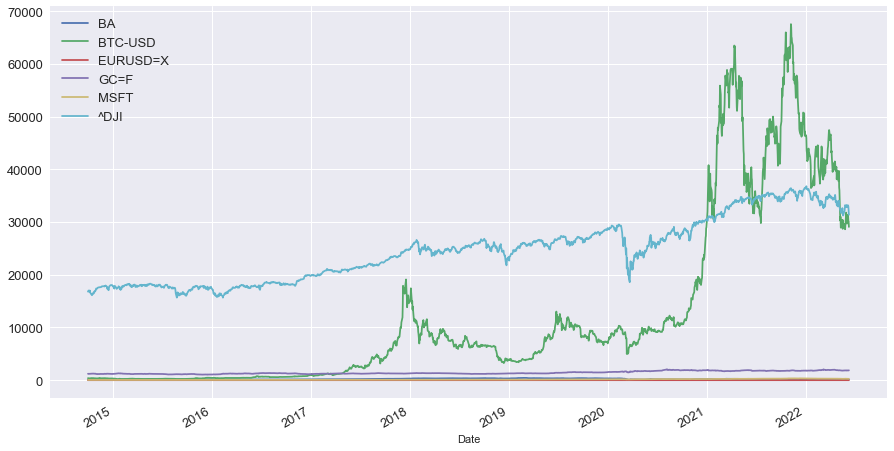

In [34]:
close.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [35]:
np.log(close / close.shift()).info() # keep NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2811 entries, 2014-09-30 to 2022-06-10
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1519 non-null   float64
 1   BTC-USD   2810 non-null   float64
 2   EURUSD=X  1600 non-null   float64
 3   GC=F      1518 non-null   float64
 4   MSFT      1519 non-null   float64
 5   ^DJI      1519 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


In [36]:
close.apply(lambda x: np.log(x.dropna() / x.dropna().shift())).info() # remove NaN

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2811 entries, 2014-09-30 to 2022-06-10
Freq: D
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BA        1938 non-null   float64
 1   BTC-USD   2810 non-null   float64
 2   EURUSD=X  2004 non-null   float64
 3   GC=F      1936 non-null   float64
 4   MSFT      1938 non-null   float64
 5   ^DJI      1938 non-null   float64
dtypes: float64(6)
memory usage: 153.7 KB


In [37]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

,BA,BTC-USD,EURUSD=X,GC=F,MSFT,^DJI
Date,,,,,,
2014-09-30,NaN,NaN,NaN,NaN,NaN,NaN
2014-10-01,-0.0215,-0.0086,NaN,0.0034,-0.0100,-0.0141
2014-10-02,-0.0040,-0.0225,-0.0003,-0.0003,-0.0031,-0.0002
2014-10-03,0.0175,-0.0424,0.0037,-0.0183,0.0072,0.0123
2014-10-04,NaN,-0.0891,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2022-06-06,-0.0001,0.0478,-0.0023,-0.0034,-0.0047,0.0005
2022-06-07,0.0113,-0.0069,-0.0032,0.0045,0.0139,0.0080
2022-06-08,-0.0085,-0.0307,0.0007,0.0024,-0.0077,-0.0081


In [ ]:
returns.info()

In [ ]:
returns.describe()

In [ ]:
summary = returns.agg(["mean", "std"]).T
summary

In [ ]:
summary.columns = ["Mean", "Std"]
summary

In [ ]:
summary.plot(kind = "scatter", x = "Std", y = "Mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "Std"]+0.00005, summary.loc[i, "Mean"]+0.00005), size = 15)
plt.xlabel("Risk (std)", fontsize = 15)
plt.ylabel("Mean Return", fontsize = 15)
plt.title("Mean-Variance Analysis", fontsize = 20)
plt.show()

-> There is __no clear "best-performer"__ among ["EURUSD=X", "GC=F", "^DJI", "MSFT", "BTC-USD"] (without further analysis). __Higher risk__ is getting rewarded with __higher returns__. __BA underperformed__.

__Take Home: Mean-Variance Analysis has one major shortcoming: It assumes that financial returns follow a Normal Distribution. That´s (typically) not True.<br> -> Standard Deviation of Returns underestimates the true/full risk of an Investment as it fails to measure "Tail Risks".__ 

## Normality of Financial Returns 

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift()) 
msft

In [ ]:
msft.describe()

In [ ]:
msft.log_ret.plot(kind = "hist", figsize = (15 ,8), bins = 100, fontsize = 15, density = False) # Frequency Distribution of log returns
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("Frequency", fontsize = 15)
plt.title("Frequency Distribution of Returns", fontsize = 20)
plt.show()

__Do MSFT Returns follow a Normal Distribution?__ <br><br>
A normally distributed random variable can be fully described by its 
- mean
- standard deviation

Higher Central Moments are zero:
- Skew = 0 (measures symmetrie around the mean)
- (Excess) Kurtosis = 0 (positve excess Kurtosis -> more observations in the "tails")

In [ ]:
mu = msft.log_ret.mean()
mu

In [ ]:
sigma = msft.log_ret.std()
sigma

In [ ]:
import scipy.stats as stats

In [ ]:
stats.skew(msft.log_ret.dropna()) # in a Normal Distribution: skew == 0

In [ ]:
stats.kurtosis(msft.log_ret.dropna(), fisher = True) # in a Normal Distribution: (fisher) kurtosis == 0

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__

In [ ]:
x = np.linspace(msft.log_ret.min(), msft.log_ret.max(), 10000)
x

In [ ]:
y = stats.norm.pdf(x, loc = mu, scale = sigma) # creating y values a for normal distribution with mu, sigma
y

In [ ]:
plt.figure(figsize = (20, 8))
plt.hist(msft.log_ret, bins = 500, density = True, label = "Frequency Distribution of daily Returns (MSFT)")
plt.plot(x, y, linewidth = 3, color = "red", label = "Normal Distribution")
plt.title("Normal Distribution", fontsize = 20)
plt.xlabel("Daily Returns", fontsize = 15)
plt.ylabel("pdf", fontsize = 15)
plt.legend(fontsize = 15)
plt.show()

__-> MSFT Returns exhibit "Fat Tails" (extreme positive/negative outcomes).__ 

__Testing the normality of MSFT Returns based on the sample (Oct 2014 to May 2021):__ <br>
__-> Hypothesis Test with H0 Hypothesis: MSFT Returns (full population) follow a normal Distribution.__ 

In [ ]:
z_stat, p_value = stats.normaltest(msft.log_ret.dropna())

In [ ]:
z_stat # high values -> reject H0

In [ ]:
p_value # low values (close to zero) -> reject H0

In [ ]:
round(p_value, 10)

__-> Assuming that MSFT Returns (generally) follow a Normal Distribution, there is 0% probability that we get that extreme outcomes in a sample.__ 

__Take Home: MSFT Returns don´t follow a Normal Distribution as they exhibit "Fat Tails". Extreme Events/Outcomes are not reflected in the Mean-Variance Analysis. The Standard Deviation of Returns underestimates true Risk.__

## Annualizing Mean Return and Std of Returns

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"], usecols = ["Date", "Price"])

In [ ]:
msft

In [ ]:
msft["log_ret"] = np.log(msft.Price / msft.Price.shift())

In [ ]:
msft.log_ret.agg(["mean", "std"]) # mean and std based on daily returns

In [ ]:
ann_mu = msft.log_ret.mean() * 252 
ann_mu

In [ ]:
cagr = np.exp(ann_mu) - 1 # don´t mix up with cagr
cagr

In [ ]:
ann_std = msft.log_ret.std() * np.sqrt(252) 
ann_std

In [ ]:
ann_std = np.sqrt(msft.log_ret.var() * 252) # annualized std of returns (Alt 2)
ann_std

## Resampling / Smoothing

In [ ]:
msft.Price.plot(figsize = (12, 8))
plt.legend()
plt.show()

In [ ]:
monthly = msft.Price.resample("M").last() ## resample to monthly (month end)
monthly

In [ ]:
monthly.plot(figsize = (12, 8))
plt.legend()
plt.show()

__How will the Mean-Variance Analysis change with smoothed data?__

In [ ]:
freqs = ["A", "Q", "M", "W-Fri", "D"]
periods = [1, 4, 12, 52, 252]
ann_mean = []
ann_std = []

In [ ]:
for i in range(5):
    resamp = msft.Price.resample(freqs[i]).last() # resample
    ann_mean.append(np.log(resamp / resamp.shift()).mean() * periods[i]) # calc. annualized mean
    ann_std.append(np.log(resamp / resamp.shift()).std() * np.sqrt(periods[i])) # calc. annualized std

In [ ]:
ann_mean

In [ ]:
summary = pd.DataFrame(data = {"ann_std":ann_std, "ann_mean":ann_mean}, index = freqs)
summary

In [ ]:
summary.plot(kind = "scatter", x = "ann_std", y = "ann_mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "ann_std"]+0.001, summary.loc[i, "ann_mean"]+0.001), size = 15)
plt.ylim(0, 0.3)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

__-> Smoothing reduces (observed) Risk__. 

Dubious practices:
- Managing (Manipulating) Performance in Performance Reportings.
- Comparing assets with different granularity and pricing mechanisms -> e.g. non-listed (alternative assets) vs. listed assets 
- Adjusting granularity to investor´s (average) holding period -> Volatility is still there.

## Rolling Statistics

__(Another) general Rule in Finance/Investing: Past performance is not an indicator of future performance__.

In [ ]:
msft

In [ ]:
ann_mu = msft.log_ret.mean() * 252 # annualized mean return
ann_mu

In [ ]:
ann_std = msft.log_ret.std() * np.sqrt(252) # annualized std of returns (Alt 1)
ann_std

__Are Return and Risk constant over time? No, of course not! They change over time.__

__Let´s measure/quantify this with rolling statistics!__

In [ ]:
window = 252 # rolling window 252 trading days (~ 1 Year)

In [ ]:
msft.log_ret.rolling(window = 252)

In [ ]:
msft.log_ret.rolling(window = 252).sum() # Alt 1

In [ ]:
roll_mean = msft.log_ret.rolling(window = 252).mean() * 252 # Alt 2
roll_mean

In [ ]:
roll_mean.iloc[250:]

In [ ]:
roll_mean.plot(figsize = (12, 8))
plt.show()

In [ ]:
roll_std = msft.log_ret.rolling(window = 252).std() * np.sqrt(252)
roll_std

In [ ]:
roll_std.plot(figsize = (12, 8))
plt.show()

In [ ]:
roll_mean.plot(figsize = (12, 8))
roll_std.plot()
plt.show()

__Take Home__: Be careful, you´ll always find (sub-)periods with __low returns & high risk__ and __high returns & low risk__. 

- Analysis Period must be __sufficiently long__ to reduce impact of random noise. <br>
- Analysis Period should be __as short as possible__ and should only include the __latest trends / regimes__.
- Commonly used reporting period: __3 Years / 36 Months__

__Another Example: Simple Moving Average (Prices) - SMA__

In [ ]:
sma_window = 50

In [ ]:
msft.Price.plot(figsize = (12, 8))
msft.Price.rolling(sma_window).mean().plot()
plt.show()

--------------------------------------------

__Coding Challenge #5__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

---------------------------------------------

## Short Selling / Short Positions (Part 1)

What´s the rational behind short selling an instrument? <br>
__-> making profits/positive returns when prices fall.__

__Stocks Example:__

Today an Investor __buys__ the ABC Stock for USD 100. One day later he __sells__ the stock for USD 110. <br> 
__-> Profit: USD 10__ <br>
->__Long Position__ (benefit from rising prices):

Today an Investor __borrows__ the ABC Stock from another Investor and __sells__ it for USD 100. One day later he __buys__ the stock for USD 90 and __returns__ it to the lender.<br>
__-> Profit: USD 10__  <br>
->__Short Position__ (benefit from falling prices):

In some countries (and for some instruments like stocks) short selling is prohibited. <br>
Most intuitive/popular use case for short selling: __Currencies (Forex)__

## Short Selling / Short Positions (Part 2)

__EUR/USD__ ("Long Euro" == "Short USD")

In [ ]:
t0 = 1.10
t1 = 1.25

Today an Investor __buys__ EUR 1 and pays USD 1.10. One day later he __sells__ EUR 1 for USD 1.25 <br>
__-> Profit: USD 0.15__  <br>
->__Long Position Euro__ (benefit from rising EUR prices):

In [ ]:
t1 / t0 - 1 # The EUR appreciates by 13.64% relative to USD (simple return)

-> EUR __Long__ Position returns __+13.64%__ (simple return) 

What return would you expect for the corresponding EUR __Short__ position? That´s a "no brainer": __-13.64%__, right? 

__Surprisingly, that´s incorrect!!!__

Inverse Rate: __USD/EUR__ ("Short Euro" == "Long USD")

In [ ]:
t0 = 1 / 1.10
t1 = 1 / 1.25

In [ ]:
print(t0, t1)

Today an Investor __buys__ USD 1 and pays 0.9091 Euro. One day later he __sells__ USD 1 for EUR 0.8 __<br>
-> Loss: EUR 0.1091__  <br>

In [ ]:
t1 / t0 - 1 # The USD depreciates by 12.0% relative to EUR

-> EUR __Short__ Position returns __-12.0%__ (simple return)

__Take Home: When using simple returns, long position return != short position return * (-1)__ <br>
__-> Use log returns!__

## Short Selling / Short Positions (Part 3)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.6f}'.format
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close["USDEUR=X"] = 1/close["EURUSD=X"]

In [ ]:
close

In [ ]:
fx = close[["EURUSD=X", "USDEUR=X"]].dropna().copy()

In [ ]:
fx

In [ ]:
fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
simple_ret = fx.pct_change() # simple returns
simple_ret

In [ ]:
simple_ret.add(1).prod() - 1 # compound simple returns

__-> For simple returns: long position returns != short position returns * (-1)__

In [ ]:
log_ret = np.log(fx / fx.shift()) # log returns
log_ret

In [ ]:
log_ret.sum() # cumulative log returns

__-> For log returns: long position returns == short position returns * (-1)__

In [ ]:
norm_fx = log_ret.cumsum().apply(np.exp) # normalized prices (Base 1)
norm_fx

In [ ]:
norm_fx.iloc[0] = [1, 1]

In [ ]:
norm_fx

In [ ]:
norm_fx.plot(figsize = (12,8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

--------------------------------------------

__Coding Challenge #6__

1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

---------------------------------------------

## Covariance and Correlation

Do instruments/assets __move together__ (and to what extent)? <br>

Three cases:
- unrelated (__no__ relationship/correlation)
- moving together (__positive__ relationship/correlation)
- moving in opposite directions (__negative__ relationship/correlation) 

__-> Correlation between instruments/assets play an important role in portfolio management.__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
close["USDEUR=X"] = 1/close["EURUSD=X"]
close

In [ ]:
returns = close.apply(lambda x: np.log(x.dropna() / x.dropna().shift()))
returns

In [ ]:
returns.cov() # covariance (hard to interpret)

In [ ]:
returns.corr() # correlation coefficient (easy to interpret)

Three cases:
- no correlation: __correlation coefficient == 0__
- moving together: __0 < correlation coefficient <= 1__ (positive)
- moving in opposite directions: __-1 <= correlation coefficient < 0__ (negative)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(returns.corr(), cmap = "RdYlBu_r", annot = True, annot_kws={"size":15}, vmin = -1, vmax = 1)
plt.show()

__Take Home: Similar assets are (highly) positive correlated. Different assets exhibit low/no/negative correlation.__ <br>
-> In portfolio management it´s beneficial to have assets with low/no/negative correlation (portfolio diversification effect).

## Portfolio of Assets and Portfolio Returns

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
prices = pd.DataFrame(data = {"Asset_A": [100, 112], "Asset_B":[100, 104]}, index = [0, 1])
prices

In [ ]:
prices["Total"] = prices.Asset_A + prices.Asset_B

In [ ]:
prices

In [ ]:
returns = prices.pct_change() # simple returns
returns

In [ ]:
0.5 * 0.12 + 0.5 * 0.04 # correct (portfolio return == weighted average of simple returns)

In [ ]:
log_returns = np.log(prices / prices.shift()) # log returns
log_returns

In [ ]:
0.5 * log_returns.iloc[1,0] + 0.5 * log_returns.iloc[1,1] # incorrect (portfolio return != weighted average of log returns)

__Take Home: While log returns are time-additive, they are not asset-additive.__ <br>
(While simple returns are not time-additive, they are asset-additive.)

## Margin Trading & Levered Returns (Part 1)

__Definition__: "Margin trading refers to the practice of using __borrowed funds__ from a broker to trade a financial asset, which forms the collateral for the loan from the broker." (Investopedia.com) 

In Simple Words: Investors __don´t pay the full price__ but they get the full benefit (less borrowing costs).

It´s a two edged sword: Leverage __amplifies both gains and losses__. <br> In the event of a loss, the collateral gets reduced and the Investor either posts additional margin or the brokers closes the position.

__Example__

A Trader buys a stock (stock price: 100) __on margin (50%)__. After one day the price increases to 110.<br>
Calculate __unlevered return__ and __levered return__.

In [ ]:
P0 = 100
P1 = 110
leverage = 2
margin = P0/2

In [ ]:
margin

In [ ]:
unlev_return = (P1 - P0) / P0 # simple return
unlev_return

In [ ]:
lev_return = (P1 - P0) / margin # simple return 
lev_return

In [ ]:
lev_return == unlev_return * leverage # this relationship is true for simple returns...

In [ ]:
unlev_return = np.log((P1 - P0) / P0 + 1) # log return
unlev_return

In [ ]:
lev_return = np.log((P1 - P0) / margin + 1) # log return
lev_return

In [ ]:
lev_return == unlev_return * leverage # this relationship does not hold for log returns...

__Take Home: To calculate levered returns, don´t multiply leverage with log returns!__

## Margin Trading & Levered Returns (Part 2)

__Hypothesis: For (highly) profitable Investment: The more leverage, the better?__

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
msft = pd.read_csv("msft.csv", index_col = "Date", parse_dates = ["Date"])
msft

In [ ]:
msft["Simple_Ret"] = msft.Price.pct_change() # simple returns

In [ ]:
leverage = 2

(Simplified) __Assumptions__:
- Restore leverage on a daily basis (by buying/selling shares)
- no trading costs
- no borrowing costs

In [ ]:
msft["Lev_Returns"] = msft.Returns.mul(leverage) # levered simple returns
msft

In [ ]:
msft["Lev_Returns"] = np.where(msft["Lev_Returns"] < -1, -1, msft["Lev_Returns"])

In [ ]:
msft

In [ ]:
msft[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
msft.Simple_Ret.max()

In [ ]:
msft.Lev_Returns.max()

In [ ]:
msft.Simple_Ret.min()

In [ ]:
msft.Lev_Returns.min()

__What happens when leverage greater than...?__

In [ ]:
-1 / msft.Simple_Ret.min()

__Take Home:__
1. With Leverage you can (theoretically) __lose more than the initial Margin__ (in practice: margin call / margin closeout before)
2. Even for (highly) profitable instruments: __"The more leverage the better" does not hold__.
3. It´s a two edged (__non-symmetrical__) sword: __Leverage amplifies losses more than it amplifies gains__.

--------------------------------

__Coding Challenge #7__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

---------------------------------------------

--------------------------------------

## Coding Challenge Solutions

__Coding Challenge #1__

1. Load Stock Price Data for General Electric (GE) and another ticker symbol of your choice from 2015-01-02 until 2020-12-31.<br>
Go to https://finance.yahoo.com/ and get the right ticker symbol. For instruments traded outside the US, you have to add a country/exchange suffix. <br>
Check the suffix list here https://help.yahoo.com/kb/exchanges-data-providers-yahoo-finance-sln2310.html As an example, the suffix for the National Indian Stock Exchange is .NS -> Ticker Symbol for Reliance is Reliance.NS

2. Select Close prices only and create a price chart for GE.

3. Normalize the stock prices for GE and the Ticker Symbol of your choice (Base Value: 1) and visualize! What´s the final normalized price for GE on 2020-12-30? 

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.4f}'.format
plt.style.use("seaborn")

In [ ]:
start = "2015-01-02"
end = "2020-12-31"
symbol = ["GE", "Reliance.NS"]

In [ ]:
df = yf.download(symbol, start, end)
df

In [ ]:
close = df.Close.copy()
close

In [ ]:
close.GE.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
norm = close.div(close.iloc[0]).mul(1)
norm

-> The final normalized Price is 0.4445.

In [ ]:
norm.dropna().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

__Coding Challenge #2__

1. Calculate daily returns for Bitcoin.

2. Calculate the arithmetic mean return and the standard deviation of returns for Bitcoin. 

3. Compare Bitcoin with Microsoft (mu = 0.00116, sigma = 0.01726). Does the rule "Higher Risk -> Higher Reward" hold?

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

In [ ]:
btc["Returns"] = btc.pct_change(periods = 1)
btc

In [ ]:
btc

In [ ]:
mu = btc.Returns.mean() 
mu

In [ ]:
sigma = btc.Returns.std()
sigma

In [ ]:
mu > 0.00116

In [ ]:
sigma > 0.01726

Does the rule "Higher Risk -> Higher Reward" hold? -> Yes

__Coding Challenge #3__

1. Calculate Boeing´s Investment Multiple 

2. Calculate Boeing´s CAGR

3. Calculate Boeing´s Geometric Mean Return

4. Calculate Boeing´s Investment Multiple with compound daily returns

In [ ]:
import pandas as pd
pd.options.display.float_format = '{:.4f}'.format

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["Returns"] = ba.pct_change(periods = 1)
ba

In [ ]:
multiple = ba.BA[-1] / ba.BA[0]
multiple

In [ ]:
cagr = (ba.BA[-1]/ba.BA[0])**(1/((ba.index[-1] - ba.index[0]).days / 365.25)) - 1 
cagr

In [ ]:
n = ba.Returns.count()
n

In [ ]:
geo_mean = (1 + ba.Returns).prod()**(1/n) - 1 
geo_mean

In [ ]:
multiple = ba.Returns.add(1).prod()
multiple

__Coding Challenge #4__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s log returns to calculate 
- Investment Multiple
- CAGR (assuming 252 trading days)
- Normalized Prices (Base = 1)

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
multiple = np.exp(ba.log_ret.sum())
multiple

In [ ]:
cagr = np.exp(ba.log_ret.mean() * 252) - 1
cagr

In [ ]:
norm = ba.log_ret.cumsum().apply(np.exp)
norm

__Coding Challenge #5__

1. Calculate daily log returns for Boeing.

2. Use Boeing´s daily log returns to calculate the annualized mean and annualized std (assume 252 trading days per year).

3. Resample to monthly prices and compare the annualized std (monthly) with the annualized std (daily). Any differences?

4. Keep working with monthly data and calculate/visualize the rolling 36 months mean return (annualized).

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
ann_mu = ba.log_ret.mean() * 252 
ann_mu

In [ ]:
ann_std = ba.log_ret.std() * np.sqrt(252) 
ann_std

In [ ]:
monthly = ba.BA.resample("M").last().to_frame()
monthly

In [ ]:
monthly["Returns"] = np.log(monthly / monthly.shift())
monthly

In [ ]:
ann_std = monthly.Returns.std() * np.sqrt(12) 
ann_std

-> Risk (monthly) slighly lower than Risk (daily) 

In [ ]:
window = 36

In [ ]:
roll_mean = monthly.Returns.rolling(window = window).mean() * 12
roll_mean

In [ ]:
roll_mean.plot(figsize = (12, 8))
plt.show()

__Coding Challenge #6__

1. Calculate daily log returns for Boeing.

2. Calculate the annualized mean and annualized std (assume 252 trading days per year) for a short position in Boeing (ignore Trading and Borrowing Costs).

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
ba = close["BA"].dropna().to_frame().copy()
ba

In [ ]:
ba["log_ret"] = np.log(ba / ba.shift())
ba

In [ ]:
ba["short"] = ba.log_ret * (-1)
ba

In [ ]:
ann_mean = ba.short.mean() * 252 # equal to ann_mean of long position * (-1)
ann_mean

In [ ]:
ann_std = ba.short.std() * np.sqrt(252) # same as ann_std of long position
ann_std

__Coding Challenge #7__

1. Calculate levered returns for Bitcoin (leverage = 4). 

2. Visualize and compare with unlevered Investment.

3. Some Traders trade Bitcoin with extremely high leverage (> 100). Do you think this is a good idea (assuming no additional/advanced Risk Management Tools)?

In [ ]:
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:.4f}'.format
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
close = pd.read_csv("close.csv", index_col = "Date", parse_dates = ["Date"])
close

In [ ]:
btc = close["BTC-USD"].dropna().to_frame().copy()
btc

In [ ]:
btc["Returns"] = btc.pct_change(periods = 1)
btc

In [ ]:
leverage = 4

In [ ]:
btc["Lev_Returns"] = btc.Returns.mul(leverage) # levered simple returns
btc

In [ ]:
btc["Lev_Returns"] = np.where(btc["Lev_Returns"] < -1, -1, btc["Lev_Returns"])

In [ ]:
btc[["Returns", "Lev_Returns"]].add(1).cumprod().plot(figsize = (15, 8), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

-> Trading Bitcoin with (high) leverage requires advanced risk monitoring/management. Otherwise, a complete loss is very likely (sooner or later...).